# Morula Like

Exploring a small cluster of D14 cells that stick out and seem to resemble E3/E4 morula-like cells.

In [1]:
library(Seurat)

### Seurat Object

In [8]:
rna = readRDS("./sessions/20200913_n27632/seurat.rds")
rna$tech = "rna"

### Fine Clustering

In [639]:
rna <- FindClusters(rna, resolution=4)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 59369
Number of edges: 1810771

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7932
Number of communities: 70
Elapsed time: 13 seconds


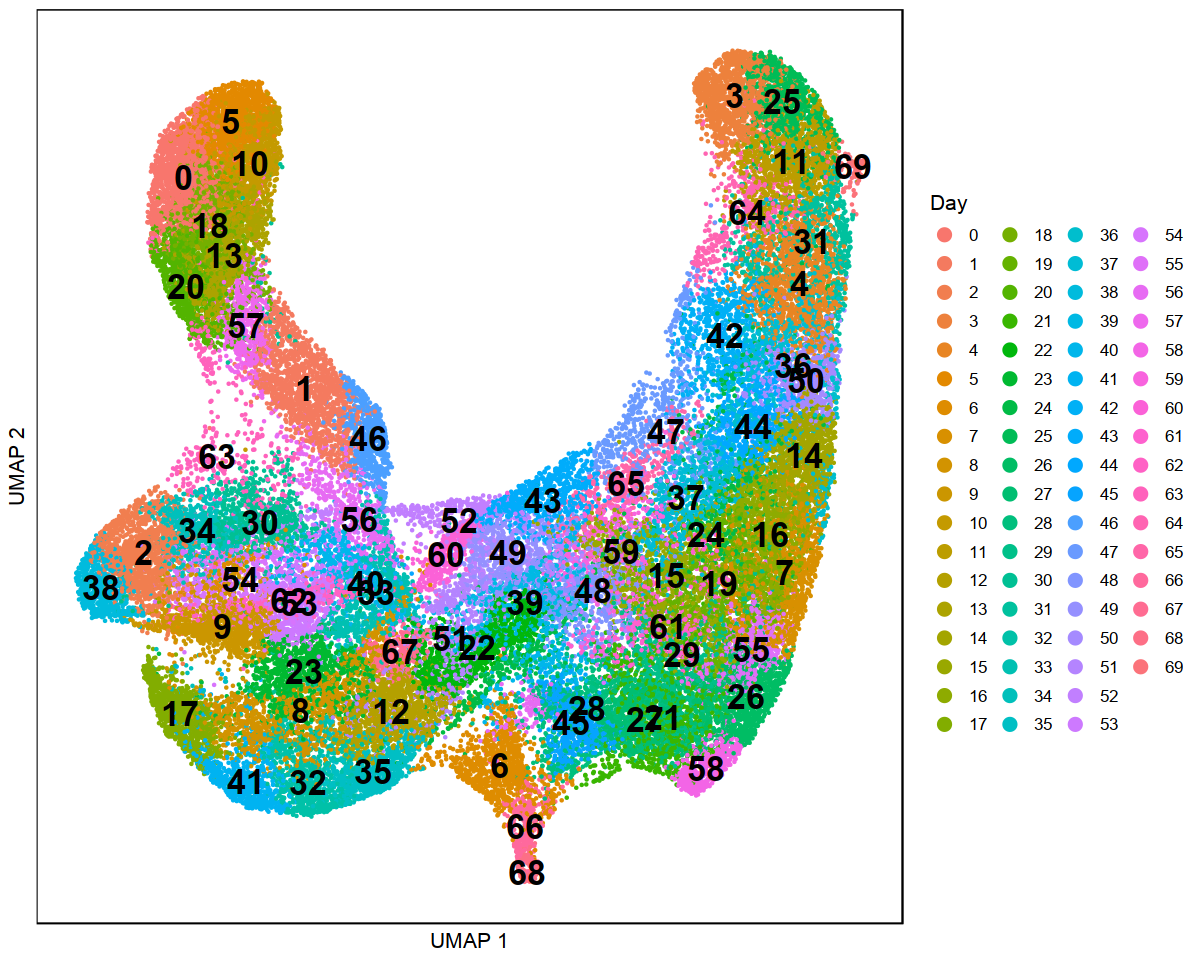

In [641]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot_df <- data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1,
                 umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                 cluster=rna$RNA_snn_res.4)
plot_df = plot_df[sample(dim(plot_df)[1]), ]

ggplot(plot_df) +
geom_point(aes(x=umap1, y=umap2, color=cluster), stroke=0, size=1) +
geom_text(data=data.frame(aggregate(plot_df[,c("umap1","umap2")], 
                            list(plot_df$cluster), median)),
         aes(x=umap1, y=umap2, label=Group.1), fontface = "bold", size=7) +
theme_classic() +
xlab("UMAP 1") + ylab("UMAP 2") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=12),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
guides(colour = guide_legend(title="Day",
     override.aes = list(shape=16, alpha=1, size=4)))

### Outlier Cluster Exploration

In [642]:
cluster_markers = FindMarkers(rna,
                              only.pos = T, 
                              ident.1 = 69, 
                              group.by = "RNA_snn_res.4", min.pct = 0.1)

In [645]:
dim(cluster_markers)

[1] 815   5

In [657]:
cluster_markers = cluster_markers[cluster_markers$avg_logFC>0.5, ]
cluster_markers = cluster_markers[cluster_markers$p_val_adj<0.05, ]

In [658]:
dim(cluster_markers)

[1] 334   5

In [960]:
write.table(rownames(cluster_markers)[cluster_markers$pct.2 < 0.05],  "tmp.txt", row.names=F, col.names=F, quote=F)

In [674]:
head(cluster_markers, 20)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KHDC1L,0,3.929535,0.991,0.032,0
CCNA1,0,3.753940,0.991,0.019,0
H3.Y,0,3.490345,0.897,0.006,0
MBD3L2,0,2.990810,0.841,0.004,0
MBD3L2B,0,2.388209,0.766,0.003,0
SLC34A2,0,1.736375,0.813,0.002,0
TPRX1,0,1.530218,0.682,0.001,0
PRAMEF8,0,1.515115,0.561,0.001,0
RFPL2,0,1.473828,0.421,0.001,0


In [737]:
"KHDC1L" %in% rownames(cluster_markers)

[1] FALSE

In [733]:
write.table(rownames(cluster_markers),  "tmp.txt", row.names=F, col.names=F, quote=F)

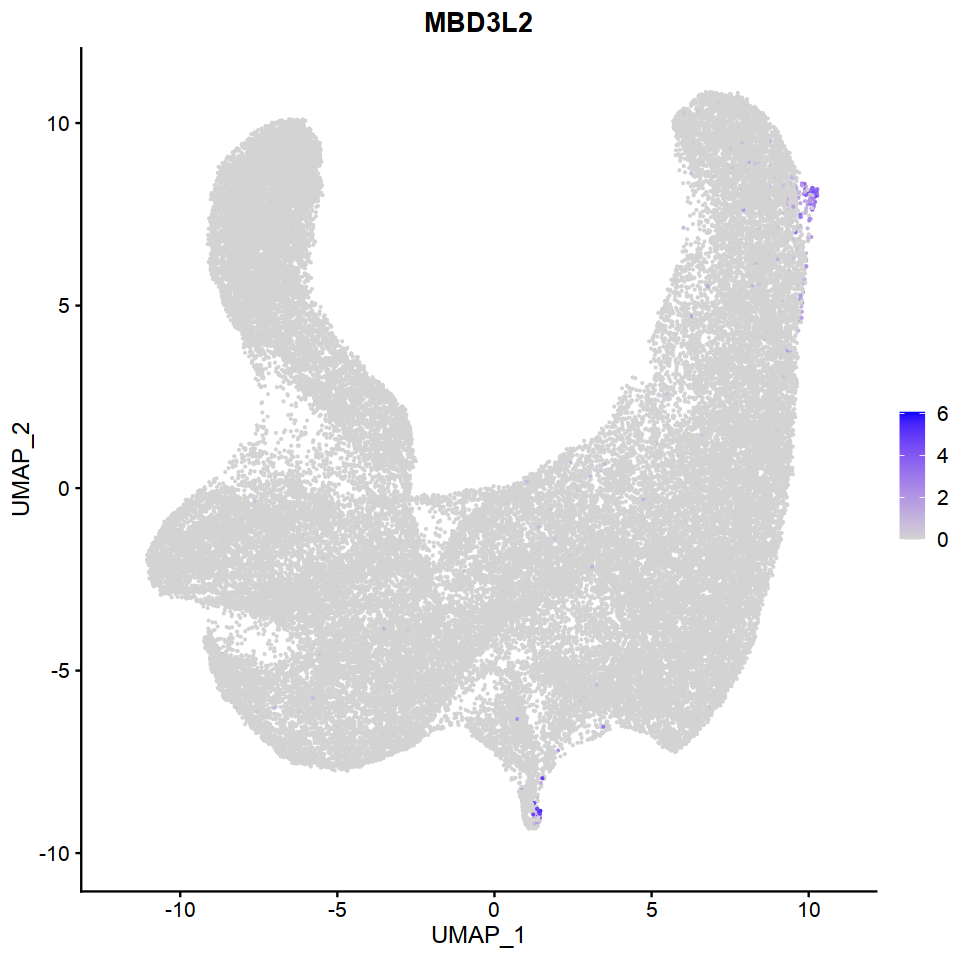

In [958]:
options(repr.plot.width = 8, repr.plot.height = 8)

FeaturePlot(rna, features = c("MBD3L2"), reduction = "umap", pt.size = 0.1, combine = FALSE)[[1]]

### Cacchiarelli Bulk RNA-seq

In [740]:
# load bulk RNA-seq data
fpkm = read.table("/users/surag/kundajelab/scATAC-reprog/resources/GSE62777/RNAseq.FPKM.tsv", sep='\t', header=T)
fpkm$gene_id = NULL
fpkm$locus=NULL
tpm = fpkm
tpm[,2:ncol(tpm)] = 1e6*t(t(tpm[,2:ncol(tpm)])/colSums(tpm[,2:ncol(tpm)]))

# removing genes with dup names
tpm = tpm[!duplicated(tpm$gene_short_name),]
rownames(tpm) = tpm$gene_short_name
tpm$gene_short_name = NULL

tpm["GAPDH",]

,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,7803.64,4963.505,3908.693,3839.776,3795.548,3364.503,3032.412,3790.955,5598.224,4731.256


In [961]:
length(rownames(cluster_markers)[cluster_markers$pct.2 < 0.01])

[1] 30

Warning message in melt(as.matrix(log2(1 + tpm)[rownames(tpm) %in% gene_set_to_plot, :
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(as.matrix(log2(1 + tpm)[rownames(tpm) %in% gene_set_to_plot,     ])). In the next version, this warning will become an error.”


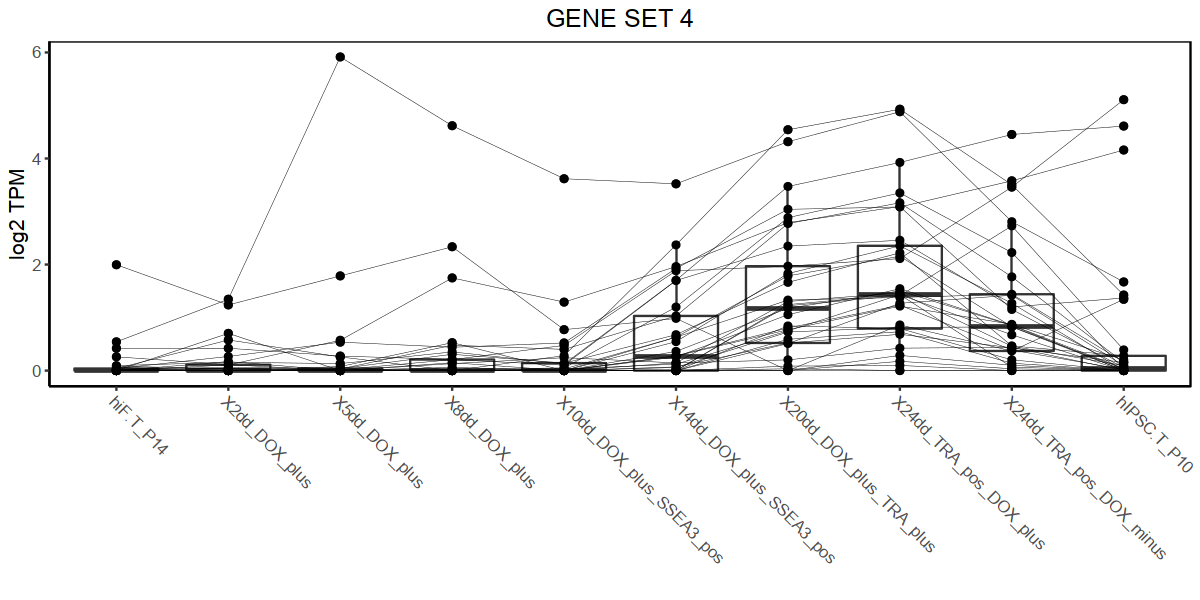

In [966]:
options(repr.plot.width = 10, repr.plot.height = 5)

gene_set_to_plot = rownames(cluster_markers)[cluster_markers$pct.2 < 0.05]
    
# filter to those that have >1 TPM at any time point
gene_set_to_plot = gene_set_to_plot[gene_set_to_plot %in% rownames(tpm)]
# gene_set_to_plot = gene_set_to_plot[rowMaxs(as.matrix(tpm[gene_set_to_plot, ]))>1]

ggplot(melt(as.matrix(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ])), aes(x=Var2, y=value)) +
#     ggplot(melt(t(scale(t(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ])))), aes(x=Var2, y=value)) +
stat_boxplot() +
    geom_line(aes(group=Var1),size=0.1) + geom_point() +
ggtitle(sprintf("GENE SET %d", i)) +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
  text = element_text(size=12),
#       axis.line=element_blank(),
  axis.text.x = element_text(angle = -45, hjust=0),
#       axis.text.y=element_blank(),
#       axis.ticks=element_blank(),
  legend.title=element_text(size=10), 
  legend.text=element_text(size=9),
  panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
ylab("log2 TPM") + xlab("") 
# coord_cartesian(ylim=c(0,10)) 

---

In [2]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Seurat_3.1.5

loaded via a namespace (and not attached):
 [1] httr_1.4.1          tidyr_1.1.2         jsonlite_1.6.1     
 [4] viridisLite_0.3.0   splines_3.6.3       lsei_1.2-0         
 [7] leiden_0.3.3        ggrepel_0.8.2       globals_0.12.5     
[10] pillar_1.4.6        lattice_0.20-41   